## Modeling a Zombie Apocalypse: A Coupled Dynamical System 



### Part 0 - Problem Selection

I've chosen to create my own coupled dynamical system. It is based on the SIR model for epidemic spread, but instead, it is a zombie apocalypse model. It keeps track of the number of susceptible people, number of zombies, number of people cured and number of dead.


________________________________________________________________________________________________________________________________________

### Part 1 - Model Statement and Description

Express your coupled dynamical system as a set of difference equations.

Explain what these equations mean. What are the different components and how do they interact? Which constants can be tweaked? What assumptions have you made? You can use a flow chart or some other visualisation of the model in addition to the difference equations if it helps you explain the dynamics. 

This question is deliberately open ended. We want you to demonstrate your creativity and ability to justify your choices. 

____________________________________________________________________________________________________________________________________________________________


The model looks like:

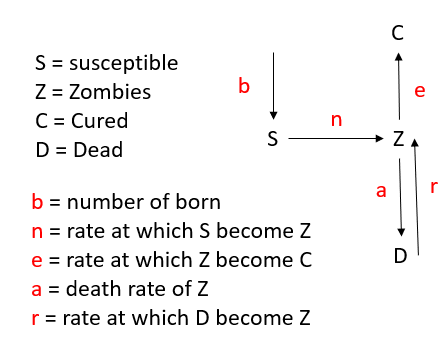

The difference equations are as shown:

$S_{i + 1} = S_{i} + b - nS_{i}Z_{i}$    
- This equation describes the number of S at a point in time t = i + 1. This is affected the previous population (S at t = i), the birth (b) and death rate (d) as well as the amount of susceptibles that turn into zombies (n*S*Z), which in turn decreases the susceptible population.

$Z_{i + 1} = Z_{i} + nS_{i}Z_{i} - (e + a)Z_{i} + rD_{i}$ 
- This equation describes the number of Z at a point in time t = i + 1. This is determined by the previous population (Z at t = i), the number of susceptibles turning into zombies (n*S*Z), the rate at which the dead turn back into zombies (r) as well as the zombies' death rate (a) and the rate at which they get cured (e). 

$C_{i + 1} = C_{i} + eZ_{i}$ 
- This equation describes the number of C at a point in time t = i + 1. This is determined by the previous population (C at t = i) and the rate at which zombies get cured (e).

$D_{i + 1} = D_{i} + aZ_{i} - rD_{i}$ 
- This equation describes the number of D at a point in time t = i + 1. This is determined by the previous population (D at t = i), the rate at which susceptibles die (d), the rate at which zombies die (a) and the rate at which the dead turn back into zombies (r).

All lowercase constants (b, d, n, e, a and r) are the constants that can be tweaked depending on the situation. The uppercase constants (S, Z, C and D) are calculated by using the lowercase constants (after an initial value is given).

In terms of assumptions, there is:

    - Once a zombie has been cured, they are no longer susceptible and therefore can't turn back to zombies.

    - Zombies can only turn susceptibles into zombies, not kill them.

    - Susceptibles and zombies can both die and come back as zombies.

    - Susceptibles cannot die from natural causes, they can only be turned into zombies, otherwise, they don't die.

### Part 2 - Discrete Time Modelling

Now that you have set out your coupled dynamical system set out as a set of difference equations, lets try modeling the system in discrete time. 

Simulate the behaviour of your coupled dynamical system. Do so for a variety of initial conditions and model parameters. 

Plot and explain your results.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#we first define the model
def apocalypse_generator(b, n, e, a, r):
    # 0 - S, 1 - Z, 2 - C, 3 - D
    def S(states):
        pop = states[0] + (b) - n*states[0]*states[1]
        if pop < 0: return 0
        return pop
    def Z(states):
        return states[1] +  n*states[0]*states[1] - (e + a)*states[1] + r*states[3]
    def C(states):
        return states[2] + e*states[1]
    def D(states):
        return states[3] + a*states[1] - r*states[3]

    apocalypse_next = lambda states: np.array([S(states), Z(states), C(states), D(states)])
    return apocalypse_next

def apocalypse_trajectory(rates, apocalypse_0, max_iter, verbose=True):
    apocalypse = apocalypse_generator(*rates)
    population =np.zeros(shape=(max_iter, apocalypse_0.shape[0]))
    apocalypse_next = apocalypse_0
    for i in range(max_iter):
        if verbose: print('t: {0}, apocalypse: {1}'.format(i, apocalypse_next))
        population[i, :] = apocalypse_next
        apocalypse_next = apocalypse(apocalypse_next)
    t = range(max_iter)
    return t, population

Text(0.5, 1.0, 'Apocalypse model')

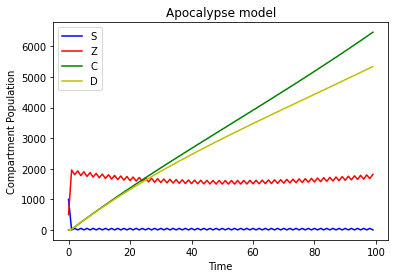

In [3]:
rates = [50, 0.003, 0.04, 0.04, 0.004] 

ap = np.array([1000, 500, 0, 0])

t, APO = apocalypse_trajectory(rates, ap, 100, verbose = False)

plt.plot(t, APO[:, 0], label='S', c = 'b')
plt.plot(t, APO[:, 1], label='Z', c = 'r')
plt.plot(t, APO[:, 2], label='C', c = 'g')
plt.plot(t, APO[:, 3], label='D', c = 'y')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Compartment Population')
plt.title('Apocalypse model')

Will be using this model as reference for the other changes

For different initial values, I will only be using 2 different sets of values as I've observed that changing the initial S, Z, C, and D values will only change the total size of that population at that certain time but will overall keep the same shape no matter the initial values, so to not be redundant only 2 initial values will be used.

As for model parameters, I will be altering each parameter to see how it affects the model.

Text(0.5, 0.98, 'Apocalypse model with low birth rate and infection rate')

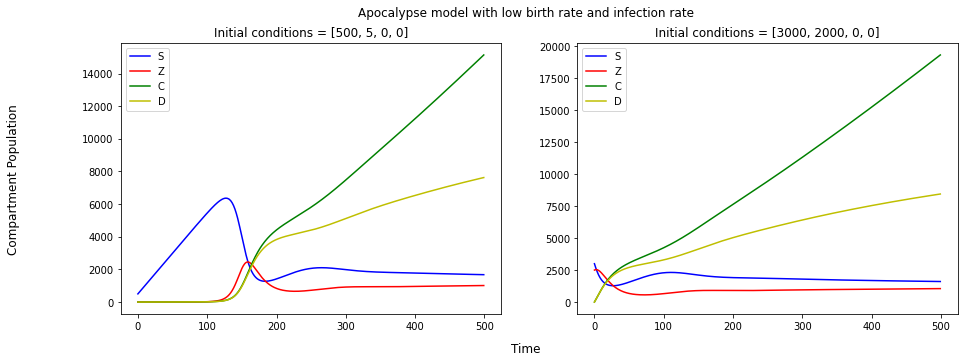

In [4]:
fig_1, ax_1 = plt.subplots(1, 2)

fig_1.set_figheight(5)
fig_1.set_figwidth(15)


rates_0 = [50, 0.00003, 0.04, 0.04, 0.004] 

ap_0 = np.array([500, 5, 0, 0])
ap_1 = np.array([3000, 2500, 0, 0])

t, APO_00 = apocalypse_trajectory(rates_0, ap_0, 500, verbose = False)
t, APO_01 = apocalypse_trajectory(rates_0, ap_1, 500, verbose = False)

ax_1[0].plot(t, APO_00[:, 0], label='S', c = 'b')
ax_1[0].plot(t, APO_00[:, 1], label='Z', c = 'r')
ax_1[0].plot(t, APO_00[:, 2], label='C', c = 'g')
ax_1[0].plot(t, APO_00[:, 3], label='D', c = 'y')
ax_1[0].legend()
ax_1[0].set_title('Initial conditions = [500, 5, 0, 0]')

ax_1[1].plot(t, APO_01[:, 0], label='S', c = 'b')
ax_1[1].plot(t, APO_01[:, 1], label='Z', c = 'r')
ax_1[1].plot(t, APO_01[:, 2], label='C', c = 'g')
ax_1[1].plot(t, APO_01[:, 3], label='D', c = 'y')
ax_1[1].legend()
ax_1[1].set_title('Initial conditions = [3000, 2000, 0, 0]')

fig_1.supxlabel('Time')
fig_1.supylabel('Compartment Population')
fig_1.suptitle('Apocalypse model with low birth rate and infection rate')


Here we can see that lowering the birth and infection rate on the first condition (with less population of S and Z) means that the Z never got the opportunity to infect the S as much, so even disregarding the low birth rate S just skyrockets while Z, C and D all stay relatively close to 0 at the start.

However, for the higher starting populations, we can see that the lower infection and birth rate do affect more as both the S and Z population decrease at first before increasing.

Moreover, we can see that for both graphs even after their very different starts they both end up looking the same after a certain period of time.

Text(0.5, 0.98, 'Apocalypse model with low birth rate and high infection rate')

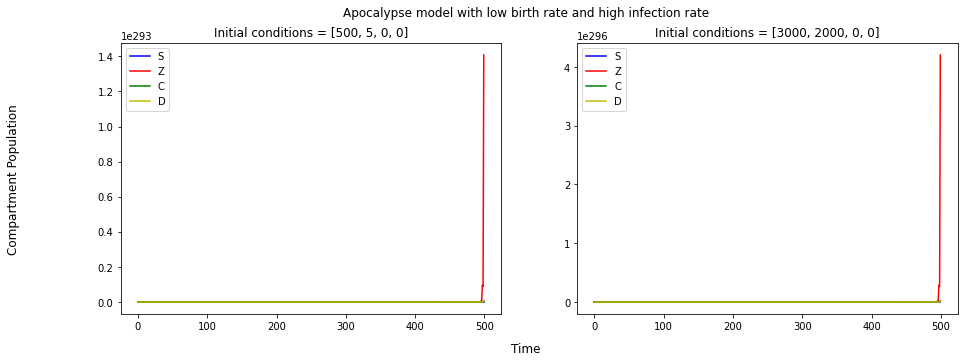

In [38]:
fig_1, ax_1 = plt.subplots(1, 2)

fig_1.set_figheight(5)
fig_1.set_figwidth(15)


rates_1 = [50, 0.3, 0.04, 0.04, 0.004]

ap_0 = np.array([500, 5, 0, 0])
ap_1 = np.array([3000, 2500, 0, 0])

t, APO_00 = apocalypse_trajectory(rates_1, ap_0, 500, verbose = False)
t, APO_01 = apocalypse_trajectory(rates_1, ap_1, 500, verbose = False)

ax_1[0].plot(t, APO_00[:, 0], label='S', c = 'b')
ax_1[0].plot(t, APO_00[:, 1], label='Z', c = 'r')
ax_1[0].plot(t, APO_00[:, 2], label='C', c = 'g')
ax_1[0].plot(t, APO_00[:, 3], label='D', c = 'y')
ax_1[0].legend()
ax_1[0].set_title('Initial conditions = [500, 5, 0, 0]')

ax_1[1].plot(t, APO_01[:, 0], label='S', c = 'b')
ax_1[1].plot(t, APO_01[:, 1], label='Z', c = 'r')
ax_1[1].plot(t, APO_01[:, 2], label='C', c = 'g')
ax_1[1].plot(t, APO_01[:, 3], label='D', c = 'y')
ax_1[1].legend()
ax_1[1].set_title('Initial conditions = [3000, 2000, 0, 0]')

fig_1.supxlabel('Time')
fig_1.supylabel('Compartment Population')
fig_1.suptitle('Apocalypse model with low birth rate and high infection rate')


With a higher infection rate, we can see that both graphs end up looking the same due to the overwhelming amount of Z, this is also due to the low birth rate, therefore S is never able to be higher than Z, and both D and C also stay pretty low as like S can't keep up with the new infections over time.

C:\Users\carmen\AppData\Local\Temp\ipykernel_36380\278320381.py:5: RuntimeWarning: overflow encountered in scalar multiply
  pop = states[0] + (b) - n*states[0]*states[1]
C:\Users\carmen\AppData\Local\Temp\ipykernel_36380\278320381.py:9: RuntimeWarning: overflow encountered in scalar multiply
  return states[1] +  n*states[0]*states[1] - (e + a)*states[1] + r*states[3]
C:\Users\carmen\AppData\Local\Temp\ipykernel_36380\278320381.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  pop = states[0] + (b) - n*states[0]*states[1]
C:\Users\carmen\AppData\Local\Temp\ipykernel_36380\278320381.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  return states[1] +  n*states[0]*states[1] - (e + a)*states[1] + r*states[3]


Text(0.5, 0.98, 'Apocalypse model with high birth rate and infection rate')

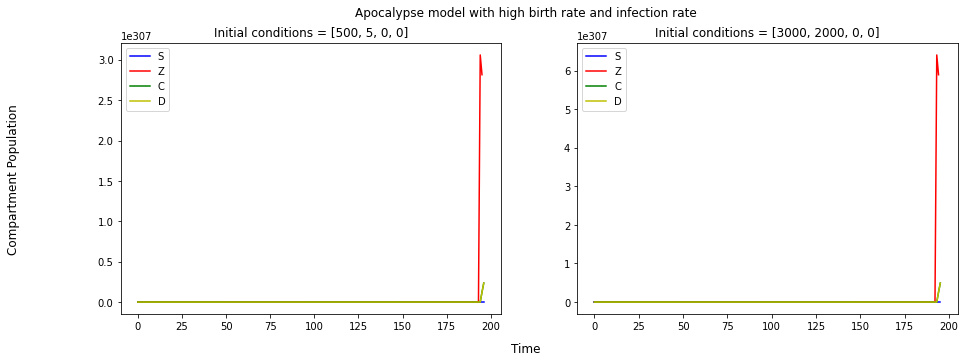

In [39]:
fig_1, ax_1 = plt.subplots(1, 2)

fig_1.set_figheight(5)
fig_1.set_figwidth(15)


rates_2 = [5000, 0.3, 0.04, 0.04, 0.004] 

ap_0 = np.array([500, 5, 0, 0])
ap_1 = np.array([3000, 2500, 0, 0])

t, APO_00 = apocalypse_trajectory(rates_2, ap_0, 500, verbose = False)
t, APO_01 = apocalypse_trajectory(rates_2, ap_1, 500, verbose = False)

ax_1[0].plot(t, APO_00[:, 0], label='S', c = 'b')
ax_1[0].plot(t, APO_00[:, 1], label='Z', c = 'r')
ax_1[0].plot(t, APO_00[:, 2], label='C', c = 'g')
ax_1[0].plot(t, APO_00[:, 3], label='D', c = 'y')
ax_1[0].legend()
ax_1[0].set_title('Initial conditions = [500, 5, 0, 0]')

ax_1[1].plot(t, APO_01[:, 0], label='S', c = 'b')
ax_1[1].plot(t, APO_01[:, 1], label='Z', c = 'r')
ax_1[1].plot(t, APO_01[:, 2], label='C', c = 'g')
ax_1[1].plot(t, APO_01[:, 3], label='D', c = 'y')
ax_1[1].legend()
ax_1[1].set_title('Initial conditions = [3000, 2000, 0, 0]')

fig_1.supxlabel('Time')
fig_1.supylabel('Compartment Population')
fig_1.suptitle('Apocalypse model with high birth rate and infection rate')


Even with an overwhelmingly high birth rate (bigger than both starting populations), we can see that this just looks the same as before as the number of Z scales proportionally with the number of S so the higher number of S the higher number of Z.

Text(0.5, 0.98, 'Apocalypse model with high birth rate and infection rate')

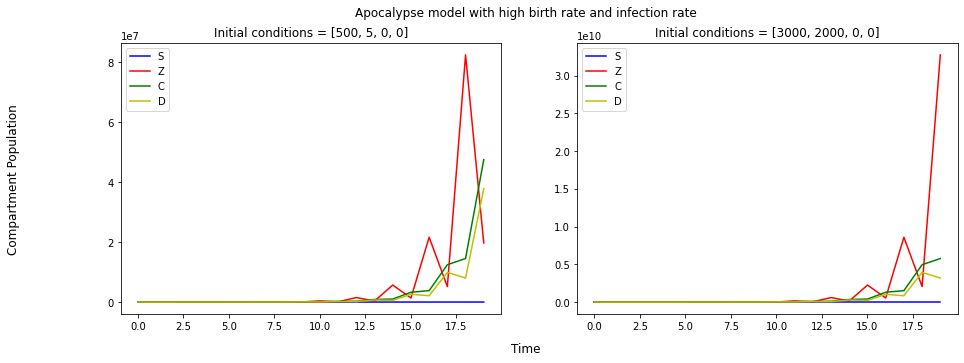

In [40]:
fig_1, ax_1 = plt.subplots(1, 2)

fig_1.set_figheight(5)
fig_1.set_figwidth(15)


rates_3 = [500, 0.03, 0.4, 0.4, 0.4] 

ap_0 = np.array([500, 5, 0, 0])
ap_1 = np.array([3000, 2500, 0, 0])

t, APO_00 = apocalypse_trajectory(rates_3, ap_0, 20, verbose = False)
t, APO_01 = apocalypse_trajectory(rates_3, ap_1, 20, verbose = False)

ax_1[0].plot(t, APO_00[:, 0], label='S', c = 'b')
ax_1[0].plot(t, APO_00[:, 1], label='Z', c = 'r')
ax_1[0].plot(t, APO_00[:, 2], label='C', c = 'g')
ax_1[0].plot(t, APO_00[:, 3], label='D', c = 'y')
ax_1[0].legend()
ax_1[0].set_title('Initial conditions = [500, 5, 0, 0]')

ax_1[1].plot(t, APO_01[:, 0], label='S', c = 'b')
ax_1[1].plot(t, APO_01[:, 1], label='Z', c = 'r')
ax_1[1].plot(t, APO_01[:, 2], label='C', c = 'g')
ax_1[1].plot(t, APO_01[:, 3], label='D', c = 'y')
ax_1[1].legend()
ax_1[1].set_title('Initial conditions = [3000, 2000, 0, 0]')

fig_1.supxlabel('Time')
fig_1.supylabel('Compartment Population')
fig_1.suptitle('Apocalypse model with high birth rate and infection rate')


In this case, I used a time interval of 20 units in order to take a closer look at what's going on, but the behaviour is the same even after increasing the units.

We can see that by increasing both the cured, revive and death rates the Z population fluctuates a lot more while the dead and cured population increases much more than in previous times. This is because the infection rate is not so high that it overwhelms the other 3 rates.

After some more testing changing the revive, death and cure rate (either up or down) results in the same or very similar shape to the one above, or in the previous example. I believe this is due to the infection rate being proportional to the population of S, so even with high rates, the birth rate will always be much higher, so the Z population will always be increasing even if they are dying at a very high rate.

### Part 3 - Continuous Time Modelling

Let's see what happens if we move into continous time now. Express your system as a set of differential equations and once again, simulate the behaviour of your system. 

Do so for;
* multiple initial conditions
* multiple sets of model parameters
* at least two diferential equation solvers, including an RK2 implementation that should be included in this submission. 

Plot and explain your results, and be sure to point out any differences between discrete and continuous time that you notice. 


The differential equations are as shown:

$\frac{dS}{dt} = b - nS_{i}Z_{i}$    

$\frac{dZ}{dt} = nS_{i}Z_{i} - (e + a)Z_{i} + rD_{i}$ 

$\frac{dC}{dt} = eZ_{i}$ 

$\frac{dD}{dt} = aZ_{i} - rD_{i}$ 


In [41]:
#we first define the model
def AP_generator_dt(b, n, e, a, r):
    # 0 - S, 1 - Z, 2 - C, 3 - D
    dSdt = lambda t, y: b - n*y[0]*y[1]
    dZdt = lambda t, y: n*y[0]*y[1] - (e + a)*y[1] + r*y[3]
    dCdt = lambda t, y: e*y[1]
    dDdt = lambda t, y: a*y[1] - r*y[3]

    dAPdt = lambda t, y: np.array([dSdt(t, y), dZdt(t, y), dCdt(t, y), dDdt(t, y)])
    return dAPdt

In [42]:
def Heun(df, y0, h, t0=0, t_max = 100, tol=1e-5, verbose=False):
    y, t = y0, t0 
    Y = np.array([y])
    T = [t]
    while t < t_max:
        if verbose: print('t={0}, y=t{1}'.format(t, y))
        k1 = df(t, y)
        k2 = df(t+h, y+h*df(t,y))
        y = y + h*(k1+k2)/2
        t = t + h
        T.append(t)
        Y = np.vstack([Y, y])
    return T, Y

In [43]:
def RK2(df, y0, h, t0=0, a=1/2, t_max=100, tol=1e-5, verbose=False):
    b = 1 - a
    alpha = 1/(2*b)
    beta = alpha
    y, t = y0, t0
    Y = np.array([y])
    T = [t]
    while t < t_max:
        if verbose: print('t={0}, y={1}'.format(t, Y))
        k1 = df(t, y)
        k2 = df(t + alpha*h, y + beta*h*k1)
        y = y + h*(a*k1 + b*k2)
        t = t + h
        T.append(t)
        Y = np.vstack([Y, y])

    return T, Y

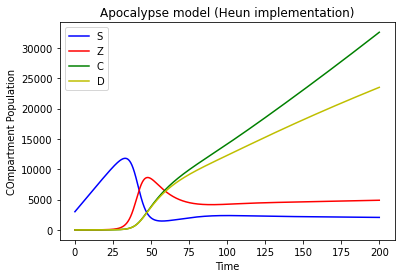

In [44]:
h = 0.01
APO = AP_generator_dt(300, 0.00003, 0.04, 0.04, 0.004)
APO_0 = np.array([3000, 5, 0, 0])
t, ap = Heun(df = APO, y0=APO_0, h=h, t0=0, t_max=200, tol=1e-5, verbose=False)

plt.plot(t, ap[:, 0], label='S', c = 'b')
plt.plot(t, ap[:, 1], label='Z', c = 'r')
plt.plot(t, ap[:, 2], label='C', c = 'g')
plt.plot(t, ap[:, 3], label='D', c = 'y')
plt.xlabel('Time')
plt.ylabel('COmpartment Population')
plt.title("Apocalypse model (Heun implementation)")
plt.legend()

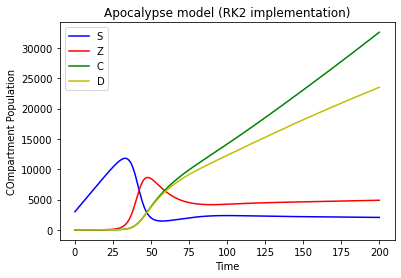

In [45]:
h = 0.01
APO = AP_generator_dt(300, 0.00003, 0.04, 0.04, 0.004)
APO_0 = np.array([3000, 5, 0, 0])
t, ap = RK2(df = APO, y0=APO_0, h=h, t0=0, t_max=200, tol=1e-5, verbose=False)

plt.plot(t, ap[:, 0], label='S', c = 'b')
plt.plot(t, ap[:, 1], label='Z', c = 'r')
plt.plot(t, ap[:, 2], label='C', c = 'g')
plt.plot(t, ap[:, 3], label='D', c = 'y')
plt.xlabel('Time')
plt.ylabel('COmpartment Population')
plt.title("Apocalypse model (RK2 implementation)")
plt.legend()

As seen above both the RK2 and Heun solvers approximate the system to the same amount of accuracy.

Text(0.5, 0.98, 'Apocalypse model with low birth rate and infection rate')

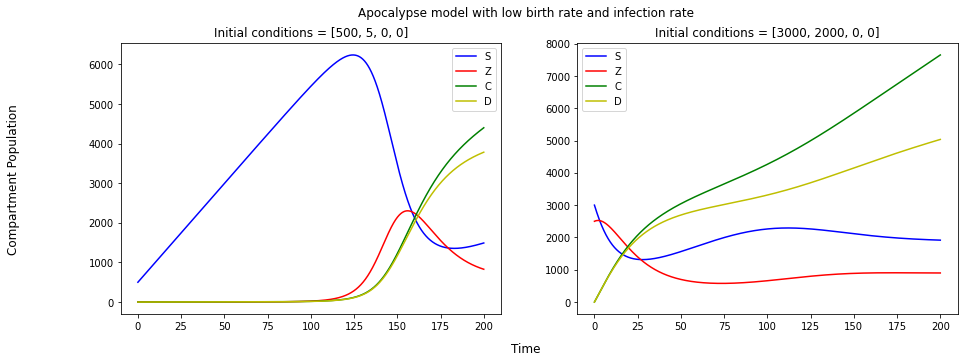

In [46]:
fig_1, ax_1 = plt.subplots(1, 2)

fig_1.set_figheight(5)
fig_1.set_figwidth(15)

h = 0.01
APO = AP_generator_dt(50, 0.00003, 0.04, 0.04, 0.004)
APO_0 = np.array([500, 5, 0, 0])
APO_1 = np.array([3000, 2500, 0, 0])
t, APO_00 = RK2(df = APO, y0=APO_0, h=h, t0=0, t_max=200, tol=1e-5, verbose=False)
t, APO_01 = RK2(df = APO, y0=APO_1, h=h, t0=0, t_max=200, tol=1e-5, verbose=False)

ax_1[0].plot(t, APO_00[:, 0], label='S', c = 'b')
ax_1[0].plot(t, APO_00[:, 1], label='Z', c = 'r')
ax_1[0].plot(t, APO_00[:, 2], label='C', c = 'g')
ax_1[0].plot(t, APO_00[:, 3], label='D', c = 'y')
ax_1[0].legend()
ax_1[0].set_title('Initial conditions = [500, 5, 0, 0]')

ax_1[1].plot(t, APO_01[:, 0], label='S', c = 'b')
ax_1[1].plot(t, APO_01[:, 1], label='Z', c = 'r')
ax_1[1].plot(t, APO_01[:, 2], label='C', c = 'g')
ax_1[1].plot(t, APO_01[:, 3], label='D', c = 'y')
ax_1[1].legend()
ax_1[1].set_title('Initial conditions = [3000, 2000, 0, 0]')

fig_1.supxlabel('Time')
fig_1.supylabel('Compartment Population')
fig_1.suptitle('Apocalypse model with low birth rate and infection rate')


Moreover, just by looking at the first set of initial values and parameters that were used before (with the difference equations), we can see that the graphs are the exact same as then.

After further testing, I found that all graphs look the same. This tells us that the implementations are approximating the system with such a small margin of error that it's as if it was using the difference equations.

### Part 4 - Stochastic Modelling

Until now we have assumed that all events occur deterministically. Lets add some randomness to our system and see what happens. 

Implement a Gillespie Algorithm version of your solver and simulate the behaviour of your system. 

As usual, make sure to do so for multiple sets of initial conditions and model parameters. 

Plot and explain your results. In particular, how does the addition of randomness affect your results? 


In [47]:
def gillespie(events, event_consequences, Y0, t0, t_max=100):
    y, t = Y0, t0
    Y, T = np.array(Y0), [t]
    while t<t_max:
        p = propensities(t, y, events=events)
        p_rel = p/sum(p)
        tte = [time_to_event(p[i]) for i in range(len(p))]
        idx = np.random.choice(range(len(p)), p=p_rel)
        event, dt = event_consequences[idx], tte[idx]
        y = event(t, y)
        t += dt    
        T += [t]
        Y = np.vstack([Y, y])

    return T, Y

time_to_event = lambda p: (-1/p)*np.log(np.random.random())

def propensities(t, y, events):
    e_ = []
    for event in events:
        e = event(t=t, y=y)
        e_.append(e)
    return e_

### Events

* birth
* infection (zombie)
* cured
* zombie dies
* zombie comes back

In [48]:
b, n, e, a, r = 100, 0.0003, 0.04, 0.04, 0.004

birth_p = lambda t, y: b
infection_p = lambda t, y: n*y[0]*y[1]
cured_p = lambda t, y: e*y[1]
death_p = lambda t, y: a*y[1]
revive_p = lambda t, y: r*y[3]

birth_delta = lambda t, y: np.array([y[0]+1, y[1], y[2], y[3]])
infection_delta = lambda t, y: np.array([y[0]-1, y[1]+1, y[2], y[3]])
cured_delta = lambda t, y: np.array([y[0], y[1]-1, y[2]+1, y[3]])
death_delta = lambda t, y: np.array([y[0], y[1]-1, y[2], y[3]+1])
revive_delta = lambda t, y: np.array([y[0], y[1]+1, y[2], y[3]-1])

events = [birth_p, infection_p, cured_p, death_p, revive_p]
event_consequences = [birth_delta, infection_delta, cured_delta, 
                      death_delta, revive_delta]

C:\Users\carmen\AppData\Local\Temp\ipykernel_36380\1442942336.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  time_to_event = lambda p: (-1/p)*np.log(np.random.random())


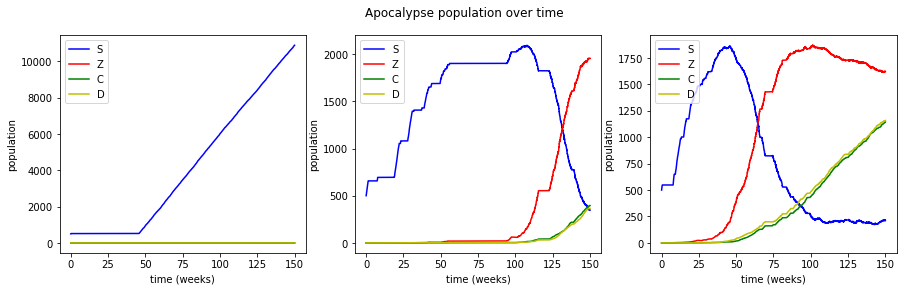

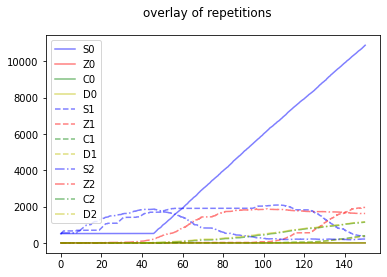

In [49]:
hyperparameters = {'b': b, 'n': n, 'e': e, 'a': a, 'r':r}
y0 = np.array([500, 1, 0, 0])

reps = 3
fig, axs = plt.subplots(1, reps)
fig2, axs2 = plt.subplots(1)
fig.set_figwidth(15)
t0=0

linestyles = ['-', '--', '-.', '.']
colors = ['b', 'r', 'g', 'y']

for rep in range(reps):
    T, Y = gillespie(events, event_consequences, y0, t0, t_max=150)

    names = ['S', 'Z', 'C', 'D']
    for i in range(Y.shape[1]):
        axs[rep].plot(T, Y[:, i], label=names[i], c=colors[i])
        axs2.plot(T, Y[:, i], label=names[i]+str(rep), c=colors[i], linestyle=linestyles[rep], alpha=0.5)
    axs[rep].set_xlabel('time (weeks)')
    axs[rep].set_ylabel('population')

fig.suptitle('Apocalypse population over time')
axs[0].legend()
axs[1].legend()
axs[2].legend()


fig2.suptitle('overlay of repetitions')
axs2.legend()

We can see that adding some randomness does alter the system but not so much that it looks completely different. We can certainly see that some events happened first in some cases like the population of Z climbing at around t = 25 as seen in the first and third graphs, but it rises later on in the 2nd graph.

But overall all three graphs keep the same if not a very similar shape, meaning the system will always end up at the same-ish points.

C:\Users\carmen\AppData\Local\Temp\ipykernel_36380\1442942336.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  time_to_event = lambda p: (-1/p)*np.log(np.random.random())


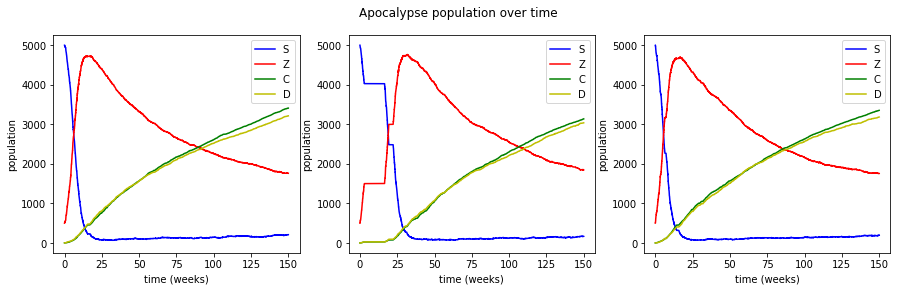

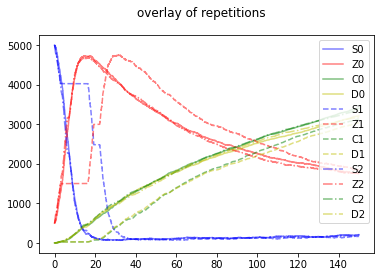

In [50]:
b, n, e, a, r = 100, 0.0003, 0.04, 0.04, 0.004

birth_p = lambda t, y: b
infection_p = lambda t, y: n*y[0]*y[1]
cured_p = lambda t, y: e*y[1]
death_p = lambda t, y: a*y[1]
revive_p = lambda t, y: r*y[3]

birth_delta = lambda t, y: np.array([y[0]+1, y[1], y[2], y[3]])
infection_delta = lambda t, y: np.array([y[0]-1, y[1]+1, y[2], y[3]])
cured_delta = lambda t, y: np.array([y[0], y[1]-1, y[2]+1, y[3]])
death_delta = lambda t, y: np.array([y[0], y[1]-1, y[2], y[3]+1])
revive_delta = lambda t, y: np.array([y[0], y[1]+1, y[2], y[3]-1])

events = [birth_p, infection_p, cured_p, death_p, revive_p]
event_consequences = [birth_delta, infection_delta, cured_delta, 
                      death_delta, revive_delta]

hyperparameters = {'b': b, 'n': n, 'e': e, 'a': a, 'r':r}
y0 = np.array([5000, 500, 0, 0])

reps = 3
fig, axs = plt.subplots(1, reps)
fig2, axs2 = plt.subplots(1)
fig.set_figwidth(15)
t0=0

linestyles = ['-', '--', '-.', '.']
colors = ['b', 'r', 'g', 'y']

for rep in range(reps):
    T, Y = gillespie(events, event_consequences, y0, t0, t_max=150)

    names = ['S', 'Z', 'C', 'D']
    for i in range(Y.shape[1]):
        axs[rep].plot(T, Y[:, i], label=names[i], c=colors[i])
        axs2.plot(T, Y[:, i], label=names[i]+str(rep), c=colors[i], linestyle=linestyles[rep], alpha=0.5)
    axs[rep].set_xlabel('time (weeks)')
    axs[rep].set_ylabel('population')

fig.suptitle('Apocalypse population over time')
axs[0].legend()
axs[1].legend()
axs[2].legend()


fig2.suptitle('overlay of repetitions')
axs2.legend()

We can see that altering the initial population, while it does change the shape of the graph as discussed before, it does not change the fact that adding randomness to the system will still result in the same shape as before, and the system will (for the most part) always look the same no matter what events occur first.

C:\Users\carmen\AppData\Local\Temp\ipykernel_36380\1442942336.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  time_to_event = lambda p: (-1/p)*np.log(np.random.random())


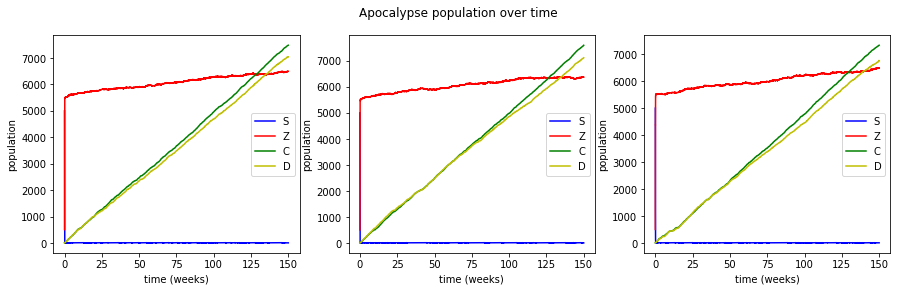

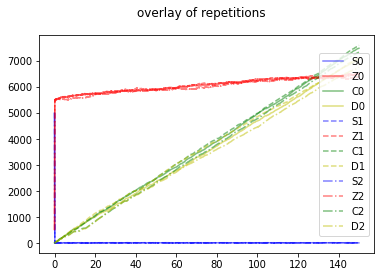

In [34]:
b, n, e, a, r = 500, 0.03, 0.04, 0.04, 0.004

birth_p = lambda t, y: b
infection_p = lambda t, y: n*y[0]*y[1]
cured_p = lambda t, y: e*y[1]
death_p = lambda t, y: a*y[1]
revive_p = lambda t, y: r*y[3]

birth_delta = lambda t, y: np.array([y[0]+1, y[1], y[2], y[3]])
infection_delta = lambda t, y: np.array([y[0]-1, y[1]+1, y[2], y[3]])
cured_delta = lambda t, y: np.array([y[0], y[1]-1, y[2]+1, y[3]])
death_delta = lambda t, y: np.array([y[0], y[1]-1, y[2], y[3]+1])
revive_delta = lambda t, y: np.array([y[0], y[1]+1, y[2], y[3]-1])

events = [birth_p, infection_p, cured_p, death_p, revive_p]
event_consequences = [birth_delta, infection_delta, cured_delta, 
                      death_delta, revive_delta]

hyperparameters = {'b': b, 'n': n, 'e': e, 'a': a, 'r':r}
y0 = np.array([5000, 500, 0, 0])

reps = 3
fig, axs = plt.subplots(1, reps)
fig2, axs2 = plt.subplots(1)
fig.set_figwidth(15)
t0=0

linestyles = ['-', '--', '-.', '.']
colors = ['b', 'r', 'g', 'y']

for rep in range(reps):
    T, Y = gillespie(events, event_consequences, y0, t0, t_max=150)

    names = ['S', 'Z', 'C', 'D']
    for i in range(Y.shape[1]):
        axs[rep].plot(T, Y[:, i], label=names[i], c=colors[i])
        axs2.plot(T, Y[:, i], label=names[i]+str(rep), c=colors[i], linestyle=linestyles[rep], alpha=0.5)
    axs[rep].set_xlabel('time (weeks)')
    axs[rep].set_ylabel('population')

fig.suptitle('Apocalypse population over time')
axs[0].legend()
axs[1].legend()
axs[2].legend()


fig2.suptitle('overlay of repetitions')
axs2.legend()

Reiterating my point, while changing the parameters from the previous ones does change the shape of the graph as shown in the previous parts of this assessment, it doesn't affect how the randomness behaves as the graphs still look pretty much the same even after adding the randomness given by the Gillespie function.

### Part 5 - Steady State Analysis

Some dynamical systems will eventually converge to a steady state, where the rate of change for each compartment is 0. 

Does your model have any steady states? If so, where are they located? How stable are they? Why?

We have seen a number of methods for analysing steady states, including;
* Cobwebbing
* Phase Plane Analysis
* Linearisation about the steady state
* Local stability analysis
* Plotting the dynamics with a very long time horizon

Consider which of these techniques are appropriate to apply when analysing your model's steady states. Justify your use (or lack of use) of said methods, and explain what your results mean. 

I can't do phase plane analysis with this model as this requires 2 differential equations, we could analyse each 2 (grabbing, for example, dS/dt and dZ/dt then dS/dt and dC/dt and so on) steady states separately compare to one another but there are other options for steady-state analysis that don't take as much time and effort.

Where the points ($S^*, Z^*, C^*, D^*$) exist in the steady state, the steady state is at:

$S^* =\frac{b}{nZ}$ - Susceptibles will be at a steady state when the number of S is equal to the number of people being born over the number of people being infected (The population of S will not decrease)

$Z^*= \frac{b}{e}$ or $Z = 0$ as derived from the equation 0 = eZ as e will never equal 0. - Zombies will be at a steady state when the number of Z is equal to the number of people being over the rate at which Z is cured. 

$D^* =\frac{aZ}{r}$ - Dead Zombies will be at a steady state when the number of D is equal to the number of Z dying over the rate at which D gets revived.

In [35]:

def cobwebbing(rates, P0=10, max_iter=10):
    fig, axs = plt.subplots(1, 3)
    
    fig.set_figheight(7)
    fig.set_figwidth(15)

    states = np.array([500, 5, 0, 0])
    t, APO = apocalypse_trajectory(rates, states, 100, verbose=False)

    steady_S = rates[0]/(rates[1]*states[1])
    steady_Z = rates[0]/rates[2]
    steady_D = rates[3]*states[1]/rates[4]
    
    axs[0].plot(t, APO[:, 0], label='S', c='b')
    axs[1].plot(t, APO[:, 1], label='Z', c='r')
    axs[2].plot(t, APO[:, 3], label='D', c='y')

    axs[0].plot(t, [steady_S for i in range(100)], label='Steady S', c='g')
    axs[1].plot(t, [steady_Z for i in range(100)], label='Steady Z', c='g')
    axs[2].plot(t, [steady_D for i in range(100)], label='Steady D', c='g')

    axs[0].legend()  
    axs[1].legend()  
    axs[2].legend()  

    return axs

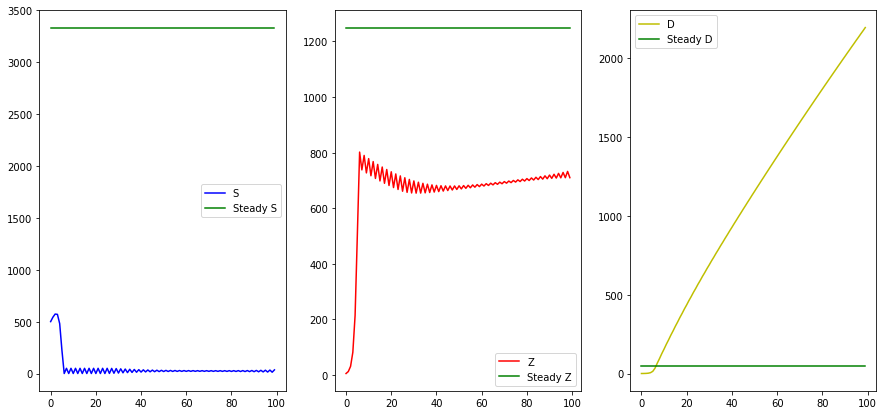

In [36]:
rates = [50, 0.003, 0.04, 0.04, 0.004]
# max_iter = 10
# for i in range(max_iter):
ax = cobwebbing(rates, P0 = 10, max_iter=i)
plt.show()

Simply by looking at the three graphs, we can see that our system never reaches a steady state, as both the population of S and the population of Z never even cross the steady state at once. And while the Dead does cross the steady state and converge to it, this still doesn't change that S and Z don't. I also didn't graph C as its steady state is when either e = 0 or Z = 0 and when these are true the steady state is also not reached as Z will never reach the steady state (based on birth rate and e) which will not be 0.

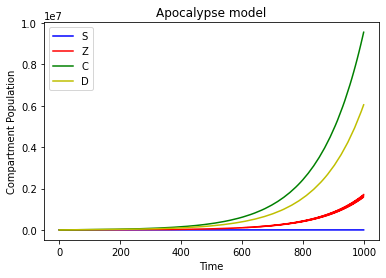

In [37]:
rates = [50, 0.003, 0.04, 0.04, 0.004]


apo_0 = np.array([3000, 5, 0, 0])

t, APO = apocalypse_trajectory(rates, apo_0, 1000, verbose = False)


plt.plot(t, APO[:, 0], label='S', c = 'b')
plt.plot(t, APO[:, 1], label='Z', c = 'r')
plt.plot(t, APO[:, 2], label='C', c = 'g')
plt.plot(t, APO[:, 3], label='D', c = 'y')
plt.xlabel('Time')
plt.ylabel('Compartment Population')
plt.title('Apocalypse model')
plt.legend()


Even when plotting the system over 1000 time units (anything larger looks the same) we can clearly see that none of the variables S, Z, C and D ever reach a state in which they are stable. S is the closest that seems to be able to reach a steady state, but given that the rest of the system never reaches this point it is irrelevant.